In [1]:
# Import necessary libraries
from simphony.libraries import siepic
from simphony.die import Die
from simphony.simulation import Simulation, Laser, Detector
import matplotlib.pyplot as plt
from phidl import set_quickplot_options

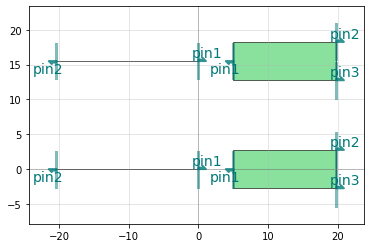

In [2]:
# Instantiate components
gc_input = siepic.GratingCoupler(name="gcinput")
y_splitter = siepic.YBranch(name="ysplit")
wg_long = siepic.Waveguide(length=150e-6, name="wglong")
wg_short = siepic.Waveguide(length=50e-6, name="wgshort")
y_recombiner = siepic.YBranch(name="yrecombiner")
gc_output = siepic.GratingCoupler(name="gcoutput")

# Instantiate Die object
die = Die(name="die1")

# Throw in the components into the Die
die.add_components([gc_input, y_splitter, wg_long, gc_output, y_recombiner, wg_short])

# Distribute the devices in the die in a grid
die.distribute_devices(direction='grid', shape=(3,2), spacing=(5,10))

# Visualize the grid arrangement
die.visualize()

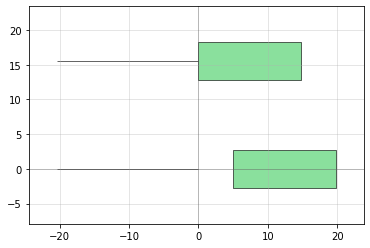

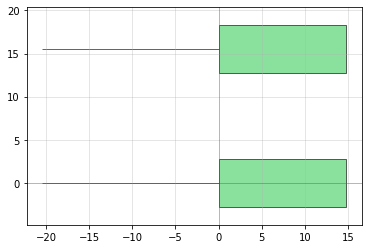

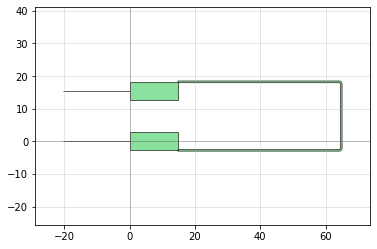

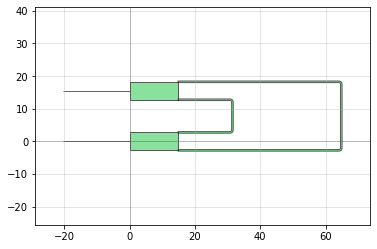

In [3]:
# We connect the components like we would usually. Simphony will take care of the routing and
# device connections for us.

# Do not show ports when plotting the layout
set_quickplot_options(False, False)

# next we connect the components to each other
y_splitter["pin1"].connect(gc_input["pin1"])
die.visualize()

y_recombiner["pin1"].connect(gc_output["pin1"])
die.visualize()

y_splitter["pin2"].connect(wg_long)
y_recombiner["pin3"].connect(wg_long)
die.visualize()

y_splitter["pin3"].connect(wg_short)
y_recombiner["pin2"].connect(wg_short)
die.visualize()

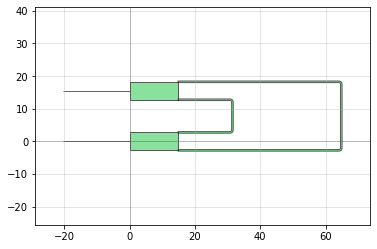

In [4]:
set_quickplot_options(show_ports=False, show_subports=False)
die.visualize() # Visualize after connecting

In [5]:
# Run the layout aware monte carlo computation
with Simulation() as sim:
    l = Laser(power=1)
    l.freqsweep(187370000000000.0, 199862000000000.0)
    l.connect(gc_input['pin2'])
    d = Detector()
    d.connect(gc_output['pin2'])

    results = sim.layout_aware_simulation()

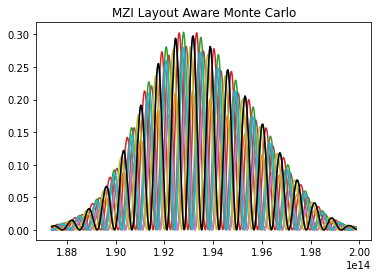

In [6]:
# Plot the results
f = l.freqs
for run in results:
    p = []
    for sample in run:
        for data_list in sample:
            for data in data_list:
                p.append(data)
    plt.plot(f, p)

run = results[0]
p = []
for sample in run:
    for data_list in sample:
        for data in data_list:
            p.append(data)
plt.plot(f, p, 'k')
plt.title('MZI Layout Aware Monte Carlo')
plt.show()